#### Here we will compare the Data of the CSV file retail sales in which we compare the sales of various products which gender buyed more male or female in various measures to tell which gender play a more important role in the growth the various product sales in various time periods

We will make some queries that help us to make more insights about the Data set 

Queries:-
1) Which Gender customers are buying most from retail 
2) Which Gender in more focused to a particular product 
3) Which season effect the Genders purchasing power in good and bad ways
4) Which Gender spends more in the Amount bases
5) Which Gender buy more in the Qunatity bases


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('retail_sales_dataset.csv')
# df.head(10)

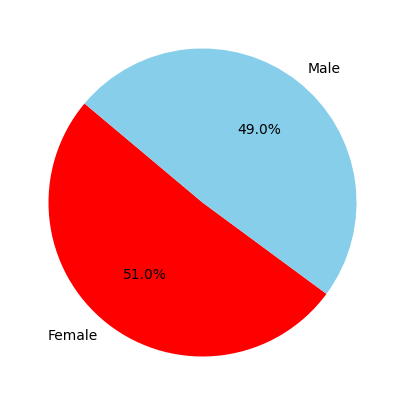

In [4]:
"""1) Here we will find which Gender buyers are more in the retail shop in total numbers of buyers"""

Gender_qunatity=df['Gender'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(Gender_qunatity,labels=Gender_qunatity.index,autopct ='%1.1f%%',colors=['Red','Skyblue'],startangle =140)
plt.show()

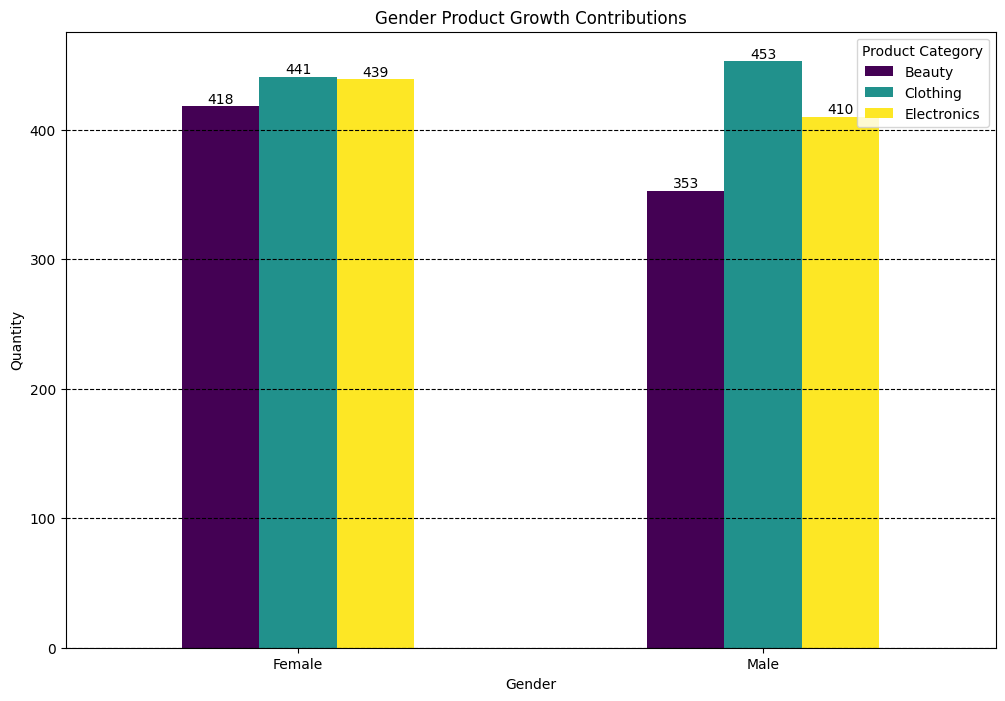

In [ ]:

"""2) Here we will find which Gender is more focused to the particular product"""

gender_product_preference = df.groupby(['Gender', 'Product Category'])['Quantity'].sum().unstack()
ax=gender_product_preference.plot(kind='bar', figsize=(12,8), colormap='viridis')
plt.title('Gender Product Growth Contributions')
plt.grid(axis='y', linestyle='--', alpha=1,color='Black')
plt.legend(title ='Product Category',loc ='upper right')
plt.xlabel('Gender')
plt.ylabel('Quantity')
for container in ax.containers:
  ax.bar_label(container,fmt='%d')
plt.xticks(rotation=0)
plt.show()

C:\Users\5530\AppData\Local\Temp\ipykernel_22000\1302445982.py:10: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax=seasonla_trends.plot(kind='bar',colormap='viridis',figsize=(10,8),color=['skyblue','Lightgreen'])
C:\Users\5530\AppData\Local\Temp\ipykernel_22000\1302445982.py:10: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax=seasonla_trends.plot(kind='bar',colormap='viridis',figsize=(10,8),color=['skyblue','Lightgreen'])


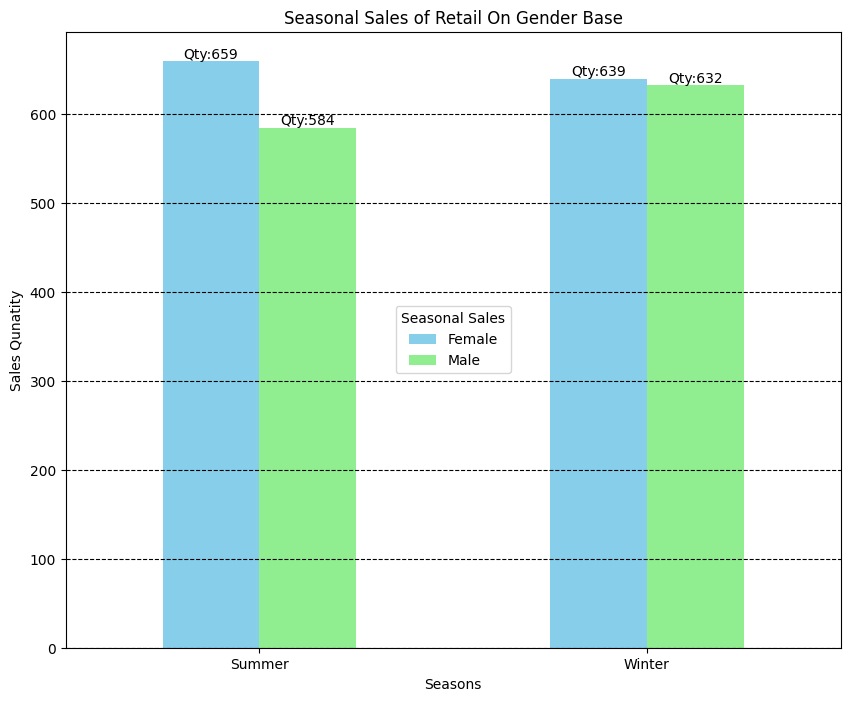

In [28]:
"""3) Here we will check which season sale effect the purchasing power of the Buyers"""

df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].dt.month.apply(lambda x:'Summer' if x in [4,5,6,7,8,9] else 'Winter')
# print(df['Season'])

seasonla_trends = df.groupby(['Season','Gender'])['Quantity'].sum().unstack()
# print(seasonla_trends)

ax=seasonla_trends.plot(kind='bar',colormap='viridis',figsize=(10,8),color=['skyblue','Lightgreen'])
plt.ylabel('Sales Qunatity')
plt.xlabel('Seasons')
plt.legend(title ='Seasonal Sales',loc='center')
plt.title('Seasonal Sales of Retail On Gender Base')
plt.xticks(rotation =0)
for container in ax.containers:
  ax.bar_label(container,labels=[f'Qty:{v}'for v in container.datavalues],fmt='%d')
plt.grid(axis='y',linestyle='--',color='Black',alpha =1)